In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

In [ ]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   acc_max        1428 non-null   float64
 1   gyro_max       1428 non-null   float64
 2   acc_kurtosis   1428 non-null   float64
 3   gyro_kurtosis  1428 non-null   float64
 4   label          1428 non-null   object 
 5   lin_max        1428 non-null   float64
 6   acc_skewness   1428 non-null   float64
 7   gyro_skewness  1428 non-null   float64
 8   post_gyro_max  1428 non-null   float64
 9   post_lin_max   1428 non-null   float64
 10  fall           1428 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 122.8+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   acc_max        356 non-null    float64
 1   gyro_max       356 non-null    float64
 2   acc_kurtosis   356 non-null    float64
 3   gyro_kurtosis  356 non-null    float64
 4   label          356 non-null    object 
 5   lin_max        356 non-null    float64
 6   acc_skewness   356 non-null    float64
 7   gyro_skewness  356 non-null    float64
 8   post_gyro_max  356 non-null    float64
 9   post_lin_max   356 non-null    float64
 10  fall           356 non-null    int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 30.7+ KB


In [ ]:
train_data = train_data.drop('label', axis=1)
test_data = test_data.drop('label', axis=1)

train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

In [ ]:
X_train = train_data.drop('fall', axis=1)
y_train = train_data['fall']
X_test = test_data.drop('fall', axis=1)
y_test = test_data['fall']

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
45/45 [==============================] - 5s 19ms/step - loss: 0.6130 - accuracy: 0.9076 - val_loss: 0.4736 - val_accuracy: 0.9466
Epoch 2/50
45/45 [==============================] - 0s 4ms/step - loss: 0.3269 - accuracy: 0.9482 - val_loss: 0.1872 - val_accuracy: 0.9579
Epoch 3/50
45/45 [==============================] - 0s 4ms/step - loss: 0.1567 - accuracy: 0.9538 - val_loss: 0.1147 - val_accuracy: 0.9663
Epoch 4/50
45/45 [==============================] - 0s 4ms/step - loss: 0.1146 - accuracy: 0.9608 - val_loss: 0.0964 - val_accuracy: 0.9635
Epoch 5/50
45/45 [==============================] - 0s 4ms/step - loss: 0.0976 - accuracy: 0.9678 - val_loss: 0.0883 - val_accuracy: 0.9635
Epoch 6/50
45/45 [==============================] - 0s 4ms/step - loss: 0.0846 - accuracy: 0.9692 - val_loss: 0.0826 - val_accuracy: 0.9663
Epoch 7/50
45/45 [==============================] - 0s 4ms/step - loss: 0.0739 - accuracy: 0.9734 - val_loss: 0.0772 - val_accuracy: 0.9691
Epoch 8/50
45/45 [=

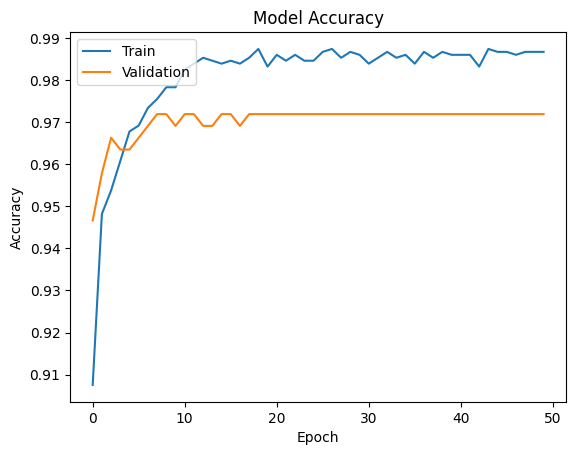

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

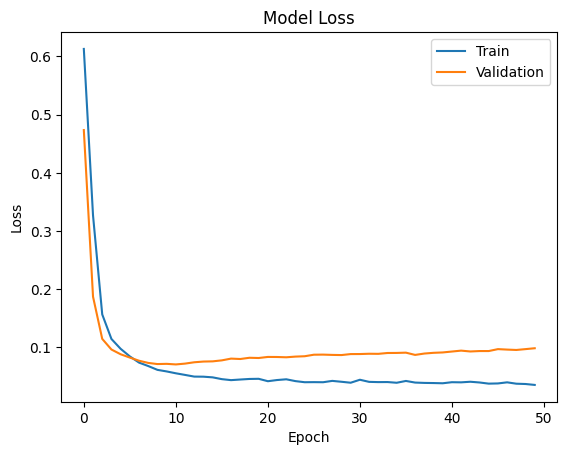

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
model.save("model3.h5")